In [1]:
url ='https://github.com/allanspadini/curso-tensorflow-proxima-palavra/raw/main/dados/train.zip'

In [2]:
import pandas as pd

df = pd.read_csv(url, header = None, names =['ClassIndex', 'Titulo', 'Descricao'])

In [3]:
df.head()

,ClassIndex,Titulo,Descricao
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli..."
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...
4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco..."


In [4]:
df['Texto'] = df['Titulo'] + ' ' + df['Descricao']
df['Texto'] 

0         Wall St. Bears Claw Back Into the Black (Reute...
1         Carlyle Looks Toward Commercial Aerospace (Reu...
2         Oil and Economy Cloud Stocks' Outlook (Reuters...
3         Iraq Halts Oil Exports from Main Southern Pipe...
4         Oil prices soar to all-time record, posing new...
                                ...                        
119995    Pakistan's Musharraf Says Won't Quit as Army C...
119996    Renteria signing a top-shelf deal Red Sox gene...
119997    Saban not going to Dolphins yet The Miami Dolp...
119998    Today's NFL games PITTSBURGH at NY GIANTS Time...
119999    Nets get Carter from Raptors INDIANAPOLIS -- A...
Name: Texto, Length: 120000, dtype: object

In [5]:
#Pre-processamento no indice, para garaintir que se inicie no 0
df['ClassIndex'] = df['ClassIndex']-1

In [6]:
#Dividendo o treino e validacao
from sklearn.model_selection import train_test_split

x_treino, x_teste, y_treino, y_teste = train_test_split(df['Texto'].values, df['ClassIndex'].values,
                                                        test_size=0.2, random_state=4256)

In [7]:
#Codificando o texto
#Tokenizacao
import tensorflow as tf

VOCAB_SIZE = 1000
encoder = tf.keras.layers.TextVectorization(max_tokens=VOCAB_SIZE)

In [8]:
encoder.adapt(x_treino)

In [9]:
encoder.get_vocabulary()[::10]

['',
 '39s',
 'it',
 'was',
 'two',
 'company',
 'than',
 'million',
 'corp',
 'which',
 'next',
 'sales',
 'announced',
 'killed',
 'if',
 'set',
 '10',
 'british',
 'prime',
 'least',
 'games',
 'month',
 'largest',
 'five',
 'sports',
 'higher',
 'being',
 'players',
 'australia',
 'like',
 'general',
 'ago',
 'rise',
 'ahead',
 'release',
 'work',
 'strong',
 'nearly',
 'attacks',
 'support',
 'sun',
 'long',
 'crude',
 'life',
 'version',
 'future',
 'yankees',
 'best',
 'results',
 'defense',
 'southern',
 'elections',
 'such',
 'hopes',
 'claims',
 'scored',
 'interest',
 'canada',
 'times',
 'winning',
 'club',
 '5',
 'aid',
 'operating',
 'almost',
 '13',
 'low',
 'exchange',
 'less',
 'fuel',
 '7',
 'division',
 'television',
 'threat',
 'investment',
 'african',
 'need',
 'arsenal',
 'ever',
 'starting',
 'until',
 'flight',
 'ban',
 'then',
 'executives',
 'researchers',
 'suicide',
 'injury',
 'kill',
 'drive',
 'leave',
 'above',
 'hard',
 'winter',
 'atlanta',
 'every',


O Encoder cria um tensor com um numpy array com uma sequencia de numeros, cada sequencia de numero representa uma palavra

Embedding faz um vetor de proximidade das palavras de para que o modelo consiga "entender" melhor

E para a camada densa receber é preciso de um polimento

In [10]:
modelo = tf.keras.Sequential([
    encoder,
    tf.keras.layers.Embedding(input_dim=len(encoder.get_vocabulary()), output_dim=16, mask_zero=True),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
])

In [11]:
modelo.compile(optimizer = tf.keras.optimizers.Adam(1e-4), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [12]:
x_teste[1]

"Palestinians Pour Out Grief Over Arafat's Death  RAMALLAH, West Bank (Reuters) - Palestinians streamed into  the streets of the West Bank and Gaza Strip on Thursday in an  outpouring of grief over the death of Yasser Arafat, the  enduring symbol of their nationalist cause."

In [13]:
modelo.predict(x_teste[:1]).argmax(axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 691ms/step


array([0], dtype=int64)

In [14]:
y_teste[1]

0

In [15]:
epocas = 10

# history = modelo.fit(x_treino, y_treino, epochs=epocas, validation_data=(x_teste, y_teste))

In [16]:
modelo = tf.keras.Sequential([
    encoder,
    tf.keras.layers.Embedding(input_dim=len(encoder.get_vocabulary()), output_dim=16, mask_zero=False),
    tf.keras.layers.Conv1D(64, kernel_size=3, activation='relu'),
    tf.keras.layers.MaxPooling1D(), #Para retornar apenas a info mais importante apos o filtro
    tf.keras.layers.Conv1D(128, kernel_size=3, activation='relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
])

modelo.compile(optimizer = tf.keras.optimizers.Adam(1e-4), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [17]:
# history = modelo.fit(x_treino, y_treino, epochs=epocas, validation_data=(x_teste, y_teste))

Aplicando camadas LSTM
Sao camadas capazes de capturar dependecias de longo prazo de forma mais eficiente

In [18]:
modelo = tf.keras.Sequential([
    encoder,
    tf.keras.layers.Embedding(input_dim=len(encoder.get_vocabulary()), output_dim=64, mask_zero=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)), #True necessario pois tera outra camada lstm
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)), #o bidericional é para ler da diretia para a esquerda tbm
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(4, activation='softmax')
])

In [19]:
modelo.compile(optimizer = tf.keras.optimizers.Adam(1e-4), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [20]:
import keras_tuner as kt #Buscando os melhores hiperparametros

In [21]:
def build_model(hp):
    model = tf.keras.Sequential([
        encoder,  # TextVectorization
        tf.keras.layers.Embedding(
            input_dim=len(encoder.get_vocabulary()),
            output_dim=hp.Int('embedding_dim', min_value=32, max_value=128, step=32),
            mask_zero=True
        ),
        # Primeira LSTM retorna sequências para capturar contexto
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(
            units=hp.Int('lstm_units_1', min_value=32, max_value=128, step=32),
            return_sequences=True
        )),
        # Segunda LSTM também retorna sequências (para pooling depois)
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(
            units=hp.Int('lstm_units_2', min_value=16, max_value=64, step=16),
            return_sequences=True
        )),
        # Pooling para reduzir de 3D -> 2D
        tf.keras.layers.GlobalMaxPooling1D(),

        # Camada densa intermediária
        tf.keras.layers.Dense(
            units=hp.Int('dense_units', min_value=32, max_value=128, step=32),
            activation='relu'
        ),
        tf.keras.layers.Dropout(
            rate=hp.Float('dropout', min_value=0.2, max_value=0.5, step=0.1)
        ),
        # Camada final de classificação
        tf.keras.layers.Dense(4, activation='softmax')
    ])

    # Usa sparse_categorical_crossentropy porque y será 1D
    model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    return model


In [22]:
tuner = kt.Hyperband(
    build_model,
    objective='val_accuracy',
    max_epochs=5,
    factor=3,
    directory='my_dir',
    project_name='classification_optimization'
)

Reloading Tuner from my_dir\classification_optimization\tuner0.json


A validação cruzada distribui os dados de treino e teste em diferentes subconjuntos várias vezes, garantindo que o modelo seja avaliado em diferentes amostras, o que melhora sua capacidade de generalização para dados não vistos.

In [23]:
#Validacao cruzada
from sklearn.model_selection import KFold
import numpy as np

In [24]:
def run_tuner(x,y, n_splits=5):

    kf=KFold(n_splits=n_splits, shuffle=True, random_state=42)

    for train_index, val_index in kf.split(x):
        x_train_fold, x_val_fold = x[train_index], x[val_index]
        y_train_fold, y_val_fold = y[train_index], y[val_index]

        tuner.search(x_train_fold, y_train_fold, epochs =10, validation_data=(x_val_fold, y_val_fold))

    best_hps = tuner.get.best_hyperparameters(num_trials=1)[0]
    print(f"""
          A pesquisa de hiperparâmetros foi concluída. O número ideal de dimensões de incorporação é {best_hps.get('embedding_dim')},
          o número ideal de unidades LSTM é {best_hps.get('lstm_units')}, e
          o número ideal de unidades densas é {best_hps.get('dense_units')},
          e a taxa de abandono ideal é {best_hps.get('dropout')}.
    """)

    return best_hps


In [25]:
# best_hps = run_tuner(x_treino, y_treino) #Deixando comentado pois demora muito a ser treinado
#Retorna os melhores HP

In [26]:
final_modelo = tf.keras.Sequential([
    encoder,
    tf.keras.layers.Embedding(input_dim=len(encoder.get_vocabulary()), output_dim=96, mask_zero=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)), #True necessario pois tera outra camada lstm
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)), #o bidericional é para ler da diretia para a esquerda tbm
    tf.keras.layers.Dense(96, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(4, activation='softmax')
])

In [27]:
final_modelo.compile(optimizer = 'adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [29]:
final_modelo.fit(x_treino, y_treino, epochs=5, validation_data=(x_teste, y_teste))

Epoch 1/5
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 184s 61ms/step - accuracy: 0.8449 - loss: 0.4407 - val_accuracy: 0.8595 - val_loss: 0.3904
Epoch 2/5
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 158s 53ms/step - accuracy: 0.8648 - loss: 0.3730 - val_accuracy: 0.8723 - val_loss: 0.3589
Epoch 3/5
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 169s 56ms/step - accuracy: 0.8777 - loss: 0.3394 - val_accuracy: 0.8770 - val_loss: 0.3564
Epoch 4/5
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 173s 57ms/step - accuracy: 0.8845 - loss: 0.3172 - val_accuracy: 0.8767 - val_loss: 0.3565
Epoch 5/5
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 173s 58ms/step - accuracy: 0.8927 - loss: 0.2908 - val_accuracy: 0.8785 - val_loss: 0.3452


In [30]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [31]:
y_pred = final_modelo.predict(x_teste)
y_pred_classes = y_pred.argmax(axis=1)

750/750 ━━━━━━━━━━━━━━━━━━━━ 12s 14ms/step


In [32]:
conf_matrix = confusion_matrix(y_teste, y_pred_classes)

<function matplotlib.pyplot.show(close=None, block=None)>

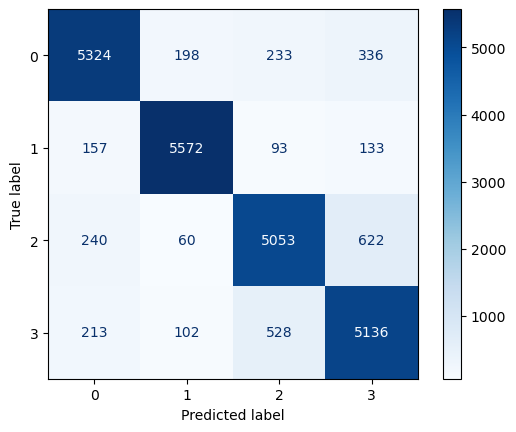

In [33]:
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,display_labels=[0,1,2,3])
disp.plot(cmap=plt.cm.Blues)
plt.show

In [34]:
#Construindo o completador de palavras
import random

random.seed(42)
df_sample = df.sample(n=1000)

In [35]:
corpus = df_sample['Texto'].to_list()

In [36]:
from tensorflow.keras.layers import TextVectorization

In [37]:
max_vocab_size = 20000
max_sequence_len = 50

In [39]:
vectorizer = TextVectorization(max_tokens=max_vocab_size, output_sequence_length=max_sequence_len, output_mode='int')

In [40]:
vectorizer.adapt(corpus)

In [41]:
tokenized_corpus = vectorizer(corpus)

In [42]:
import pickle

In [43]:
with open('vectorizer.pkl', 'wb') as file:
    pickle.dump(vectorizer,file)

In [44]:
#Passando sequencias de texto
input_sequences = []
for token_list in tokenized_corpus.numpy():
    for i in range(1,len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)

In [45]:
input_sequences

[array([6865, 1596], dtype=int64),
 array([6865, 1596, 2412], dtype=int64),
 array([6865, 1596, 2412, 3316], dtype=int64),
 array([6865, 1596, 2412, 3316,  460], dtype=int64),
 array([6865, 1596, 2412, 3316,  460,    5], dtype=int64),
 array([6865, 1596, 2412, 3316,  460,    5,  970], dtype=int64),
 array([6865, 1596, 2412, 3316,  460,    5,  970,   26], dtype=int64),
 array([6865, 1596, 2412, 3316,  460,    5,  970,   26,   26], dtype=int64),
 array([6865, 1596, 2412, 3316,  460,    5,  970,   26,   26,    2],
       dtype=int64),
 array([6865, 1596, 2412, 3316,  460,    5,  970,   26,   26,    2,  385],
       dtype=int64),
 array([6865, 1596, 2412, 3316,  460,    5,  970,   26,   26,    2,  385,
        6688], dtype=int64),
 array([6865, 1596, 2412, 3316,  460,    5,  970,   26,   26,    2,  385,
        6688,   12], dtype=int64),
 array([6865, 1596, 2412, 3316,  460,    5,  970,   26,   26,    2,  385,
        6688,   12, 7278], dtype=int64),
 array([6865, 1596, 2412, 3316,  460,  

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences #Adiciona zeros aos vetores que nao tem 50 de tamanho

In [47]:
def prepare_sequences(sequences):
    """
    Prepara as sequências para o modelo, removendo zeros à direita, adicionando padding à esquerda, truncado sequências longas e removendo sequências repetidas.

    Args:
        sequences: Um array de sequências (listas ou arrays NumPy).

    Returns:
        Um array NumPy 2D com as sequências preparadas.
    """

    # Remover zeros à direita de cada sequência
    sequences_without_trailing_zeros = []
    for seq in sequences:
        last_nonzero_index = np.argmax(seq[::-1] != 0)
        if last_nonzero_index == 0 and seq[-1] == 0:
            sequences_without_trailing_zeros.append(np.array([0]))
        else:
            sequences_without_trailing_zeros.append(seq[:-last_nonzero_index or None])

    # Remover sequências repetidas
    unique_sequences = []
    for seq in sequences_without_trailing_zeros:
        if seq.tolist() not in unique_sequences:  # Verifica se a sequência já está na lista
            unique_sequences.append(seq.tolist())  # Adiciona à lista se for única

    # Encontrar o comprimento máximo das sequências sem zeros à direita
    max_sequence_len = max(len(seq) for seq in unique_sequences)

    # Adicionar padding à esquerda para garantir o mesmo comprimento
    padded_sequences = pad_sequences(unique_sequences, maxlen=max_sequence_len, padding='pre', truncating='post')

    return padded_sequences

In [48]:
input_sequences_prepared = prepare_sequences(input_sequences)
print(input_sequences_prepared)

[[   0    0    0 ...    0 6865 1596]
 [   0    0    0 ... 6865 1596 2412]
 [   0    0    0 ... 1596 2412 3316]
 ...
 [   0    0    0 ...   16  517    7]
 [   0    0    0 ...  517    7  904]
 [   0    0    0 ...    7  904  167]]


In [49]:
#Dividindo a sequencia
x = input_sequences_prepared[:,:-1]
y = input_sequences_prepared[:,-1]

In [50]:
y = tf.keras.utils.to_categorical(y, num_classes=max_vocab_size)
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [54]:
modelo = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=max_vocab_size, output_dim=128, mask_zero=False),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)), #True necessario pois tera outra camada lstm
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)), #o bidericional é para ler da diretia para a esquerda tbm
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(max_vocab_size, activation='softmax')
])
modelo.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = modelo.fit(x,y,epochs=100, verbose=1, batch_size=64)